In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
# Conv2D 레이어 생성 코드
# padding : 경계 처리 방법 정의
# 'valid' : 유효한 영역만 출력 (출력 이미지 사이즈 감소)
# 'same' : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)

In [3]:
# MaxPool2D 레이어 생성 코드
# pool_size : 수직, 수평 축소 비율
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

In [4]:
# Dropout 레이어 생성 코드
dropout = tf.keras.layers.Dropout(rate=0.3)

In [5]:
# Batch Normalization 생성 코드
bn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(4,), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
]);

## MNIST with CNN

In [6]:
data = tf.keras.datasets.mnist
#data = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = data.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [7]:
# 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


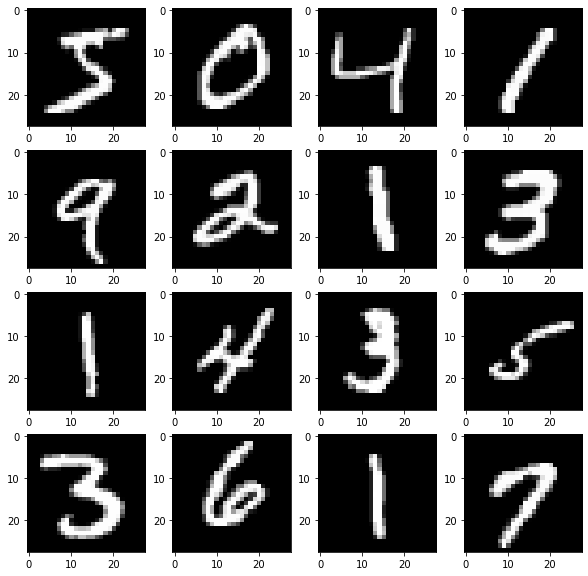

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [8]:
# 데이터 확인
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid에서 c+1번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap = 'gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트 합니다.
print(train_Y[:16])

In [9]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes= 10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes= 10)

# MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28,1 ), kernel_size=(3,3),filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

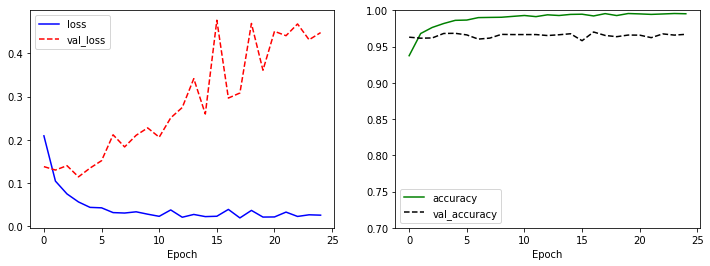

[0.38515591621398926, 0.9707000255584717]

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

## MNIST with CNN, Pooling Layer, Dropout Layer

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28,1 ), kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

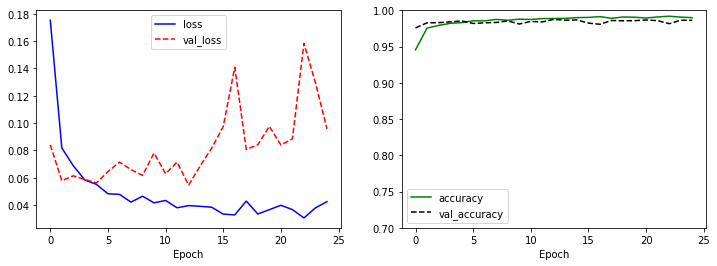

[0.08263548463582993, 0.9868999719619751]

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)